# 10章 回帰の手法を学ぼう #1

In [ ]:
pip install japanize-matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib

## 3. データセットの準備

In [ ]:
df = pd.read_csv('/content/drive/Othercomputers/DATACANVAS/github/learning/learning/samurai/ds_cource/13_machine_learning/california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [ ]:
# dropの結果を代入する場合は再実行に注意。
# 以下のようにerrorsを指定することで再実行時のエラーを回避可能
df = df.drop(columns = ['Unnamed: 0'], errors='ignore')
display(df.head())
display(df.shape)

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


(18572, 8)

In [ ]:
X = df.drop(columns=['住宅価格']).to_numpy()
y = df['住宅価格'].to_numpy()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13000, 7) (5572, 7) (13000,) (5572,)


## 4. 予測モデルの学習

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)

LinearRegression()

## 5. 予測モデルの評価

In [ ]:
model.score(X_train, y_train)


0.5967954005117011

In [ ]:
model.score(X_test, y_test)


0.5752388860477959


## 6. 予測

In [ ]:
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])
display(X_new)

array([[ 8.00e+00,  4.10e+01,  5.00e+02,  3.70e+01, -1.20e+02,  1.00e+00,
         2.00e-01],
       [ 2.00e+00,  1.00e+01,  2.00e+03,  3.80e+01, -1.22e+02,  1.50e+00,
         5.00e-01],
       [ 1.00e+00,  2.50e+01,  1.00e+03,  3.80e+01, -1.21e+02,  2.00e+00,
         1.00e+00]])

In [ ]:
model.predict(X_new)


array([3.2387497 , 1.42228534, 1.43428255])

## 7.設定したゴールに対する考察

In [ ]:
print(model.coef_)
print(model.intercept_)


[ 4.08110906e-01  6.92312594e-03  1.70628946e-05 -4.04061927e-01
 -4.10380169e-01 -2.08486703e-01  1.69589529e+00]
-34.74453851952332


<Axes: >

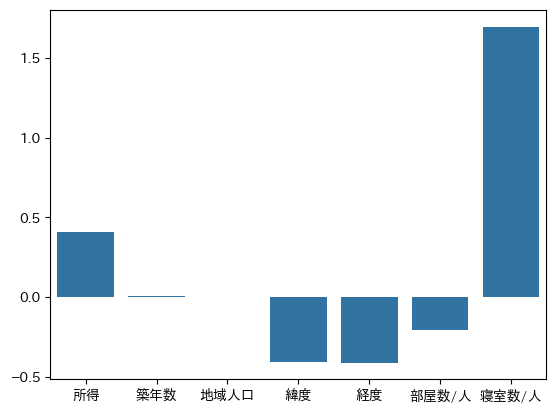

In [ ]:
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)


In [ ]:
df.describe()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,3.693262,26.983847,1470.392957,35.593231,-119.484929,1.896076,1.936448,0.398033
std,1.570045,11.431815,1162.944307,2.147712,1.980865,0.957902,1.122496,0.242479
min,0.499900,1.000000,3.000000,32.540000,-124.300000,0.149990,0.002547,0.000670
25%,2.537275,17.000000,811.000000,33.920000,-121.550000,1.154000,1.490197,0.311688
50%,3.468350,27.000000,1203.000000,34.240000,-118.450000,1.712000,1.905719,0.366856
75%,4.616100,36.000000,1781.000000,37.670000,-117.970000,2.432250,2.239138,0.435936
max,15.000100,51.000000,35682.000000,41.950000,-114.310000,5.000000,55.222222,14.194444


# 11章 回帰の手法を学ぼう 2

## 11.4 回帰手法の改善（標準化の活用）

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
display(X_train_scaled)

In [ ]:
# X_trainの変換前の状態
df_X_train = pd.DataFrame(X_train, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train.head()


In [ ]:
# 変換後の状態
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_train_scaled.head()


In [ ]:
# 標準化されているか確認
df_X_train_scaled.describe()

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
# X_testの変換前の値
df_X_test = pd.DataFrame(X_test, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test.head()


In [ ]:
# X_testの変換後の値
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数', '寝室数'])
df_X_test_scaled.head()

In [ ]:
df_X_test_scaled.describe()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

In [ ]:
model.score(X_train_scaled, y_train)

In [ ]:
model.score(X_test_scaled, y_test)

In [ ]:
# 予測用のデータ
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])


In [ ]:
X_new_scaled = scaler.transform(X_new)
display(X_new_scaled)

In [ ]:
model.predict(X_new_scaled)

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)

# 11.5 多重共線性の対処

In [ ]:
# 多重共線性とは、重回帰における説明変数の中に、相関関係が高い要素が共存している状態のことです。
# 多重共線性は、重回帰の計算式の重みに悪影響を与えます。

In [ ]:
df.drop(columns=['住宅価格'], errors='ignore').corr()
# 参考) heatmapを描いたほうがわかる

In [ ]:
# 経度と緯度の調査
sns.scatterplot(x="経度", y="緯度", data=df)

In [ ]:
# 部屋数/人の確認
sns.scatterplot(x='部屋数/人', y='寝室数/人', data=df)

In [ ]:
X = df[["所得", "築年数", "地域人口", "経度", "部屋数/人"]].to_numpy()
y = df["住宅価格"].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
scaler = StandardScaler()


In [ ]:
scaler.fit(X_train)


In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train_scaled, y_train)


In [ ]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))


In [ ]:
X_new = np.array([[8, 41, 500, 38, 2],
                  [10, 10, 1000, 40, 1],
                  [7.5, 25, 3500, 39, 3]])


In [ ]:
X_new_scaled = scaler.transform(X_new)


In [ ]:
model.predict(X_new_scaled)


In [ ]:
print(model.coef_)
print(model.intercept_)


In [ ]:
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '部屋数/人'], y=model.coef_)
